<a href="https://colab.research.google.com/github/jeonghojo00/Pytorch/blob/main/MNIST(GPU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change current directory
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Vision/MNIST')

# Preparing Data

In [58]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [5]:
# Download training dataset (60000)
dataset = MNIST(root='data/', 
                download= True,
                transform = ToTensor())

Imgae Shape: torch.Size([1, 28, 28]) and Label: 5


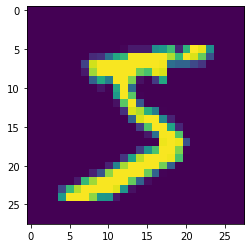

In [17]:
img, label = dataset[0]
print("Imgae Shape: {} and Label: {}".format(img.shape, label))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0])

In [20]:
# Define function split_indices to randomly pick 20% of dataset to assign as a validation set
def split_indices(n, val_pct):
    # Determine size of validation set
    n_val = int(val_pct*n)
    # Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)
print(len(train_indices), len(val_indices))
print('Last 20 sample val indices: ', val_indices[:20])

48000 12000
Last 20 sample val indices:  [57432 41326 49838 23802 22248 50564 19858  6496 37963 17259 46848 30965
 26839  4957 10030 51147 41497 15041  8272 28022]


In [27]:
# Select 10,000 images to be validation set using random_split from torch
val_size= 10000
train_size = len(dataset) - val_size

train_ds, val_ds = torch.utils.data.random_split(dataset, [train_size, val_size])
print("Number of Training images: ", len(train_ds))
print("Number of Validation images: ", len(val_ds))

Number of Training images:  50000
Number of Validation images:  10000


In [28]:
# Training sampler and data loader
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_set, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 1, 28, 28])


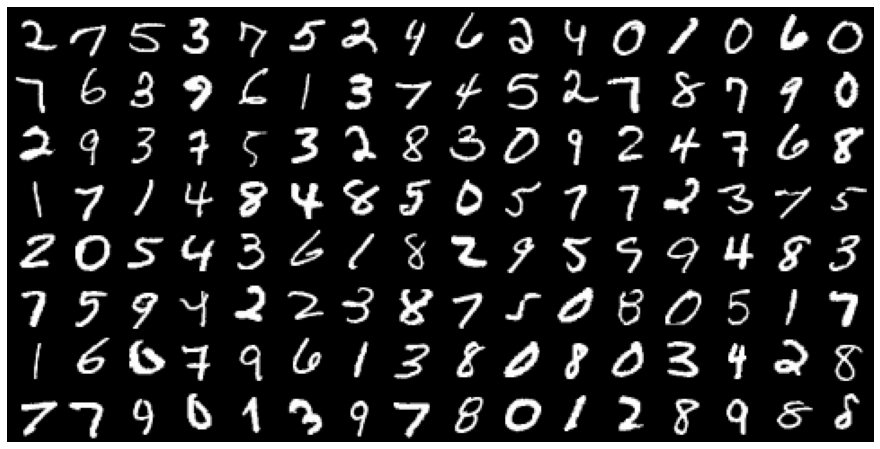

In [31]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

# Hidden Layers, Activation Function and Non_Linearity
We'll create a neural network with two layers: a hidden layer and an output layer.<br />
We'll use an activation function between two layers

In [54]:
# We reshape 28x28 into 784 to insert into hidden layer
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, images.shape[-1]*images.shape[-2]) #(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [55]:
input_size = inputs.shape[-1]
hidden_size = 32

In [63]:
layer1 = nn.Linear(input_size, hidden_size)

In [60]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


In [64]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [65]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

False

In [69]:
F.relu(torch.tensor([[1, -1, 0], 
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [70]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.6908940076828003
min(relu_outputs): 0.0
